# Unitary perturbations of Boolean networks 

Modules importation. 
biolqm is used to apply the node and edge perturbations and compute trapspaces of wild-type and mutant Boolean networks
numpy and matplotlib are used for the vizualization of results.

In [2]:
import ginsim
import biolqm
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd # for the visualization of lists of states
import scipy.stats

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-01-24`

numpy: 1.17.2
matplotlib: 3.1.1


## Wild-type model 

Loading of the model in bnet format with BioLQM

In [3]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

Visualisation of the influence graph of the wild-type network

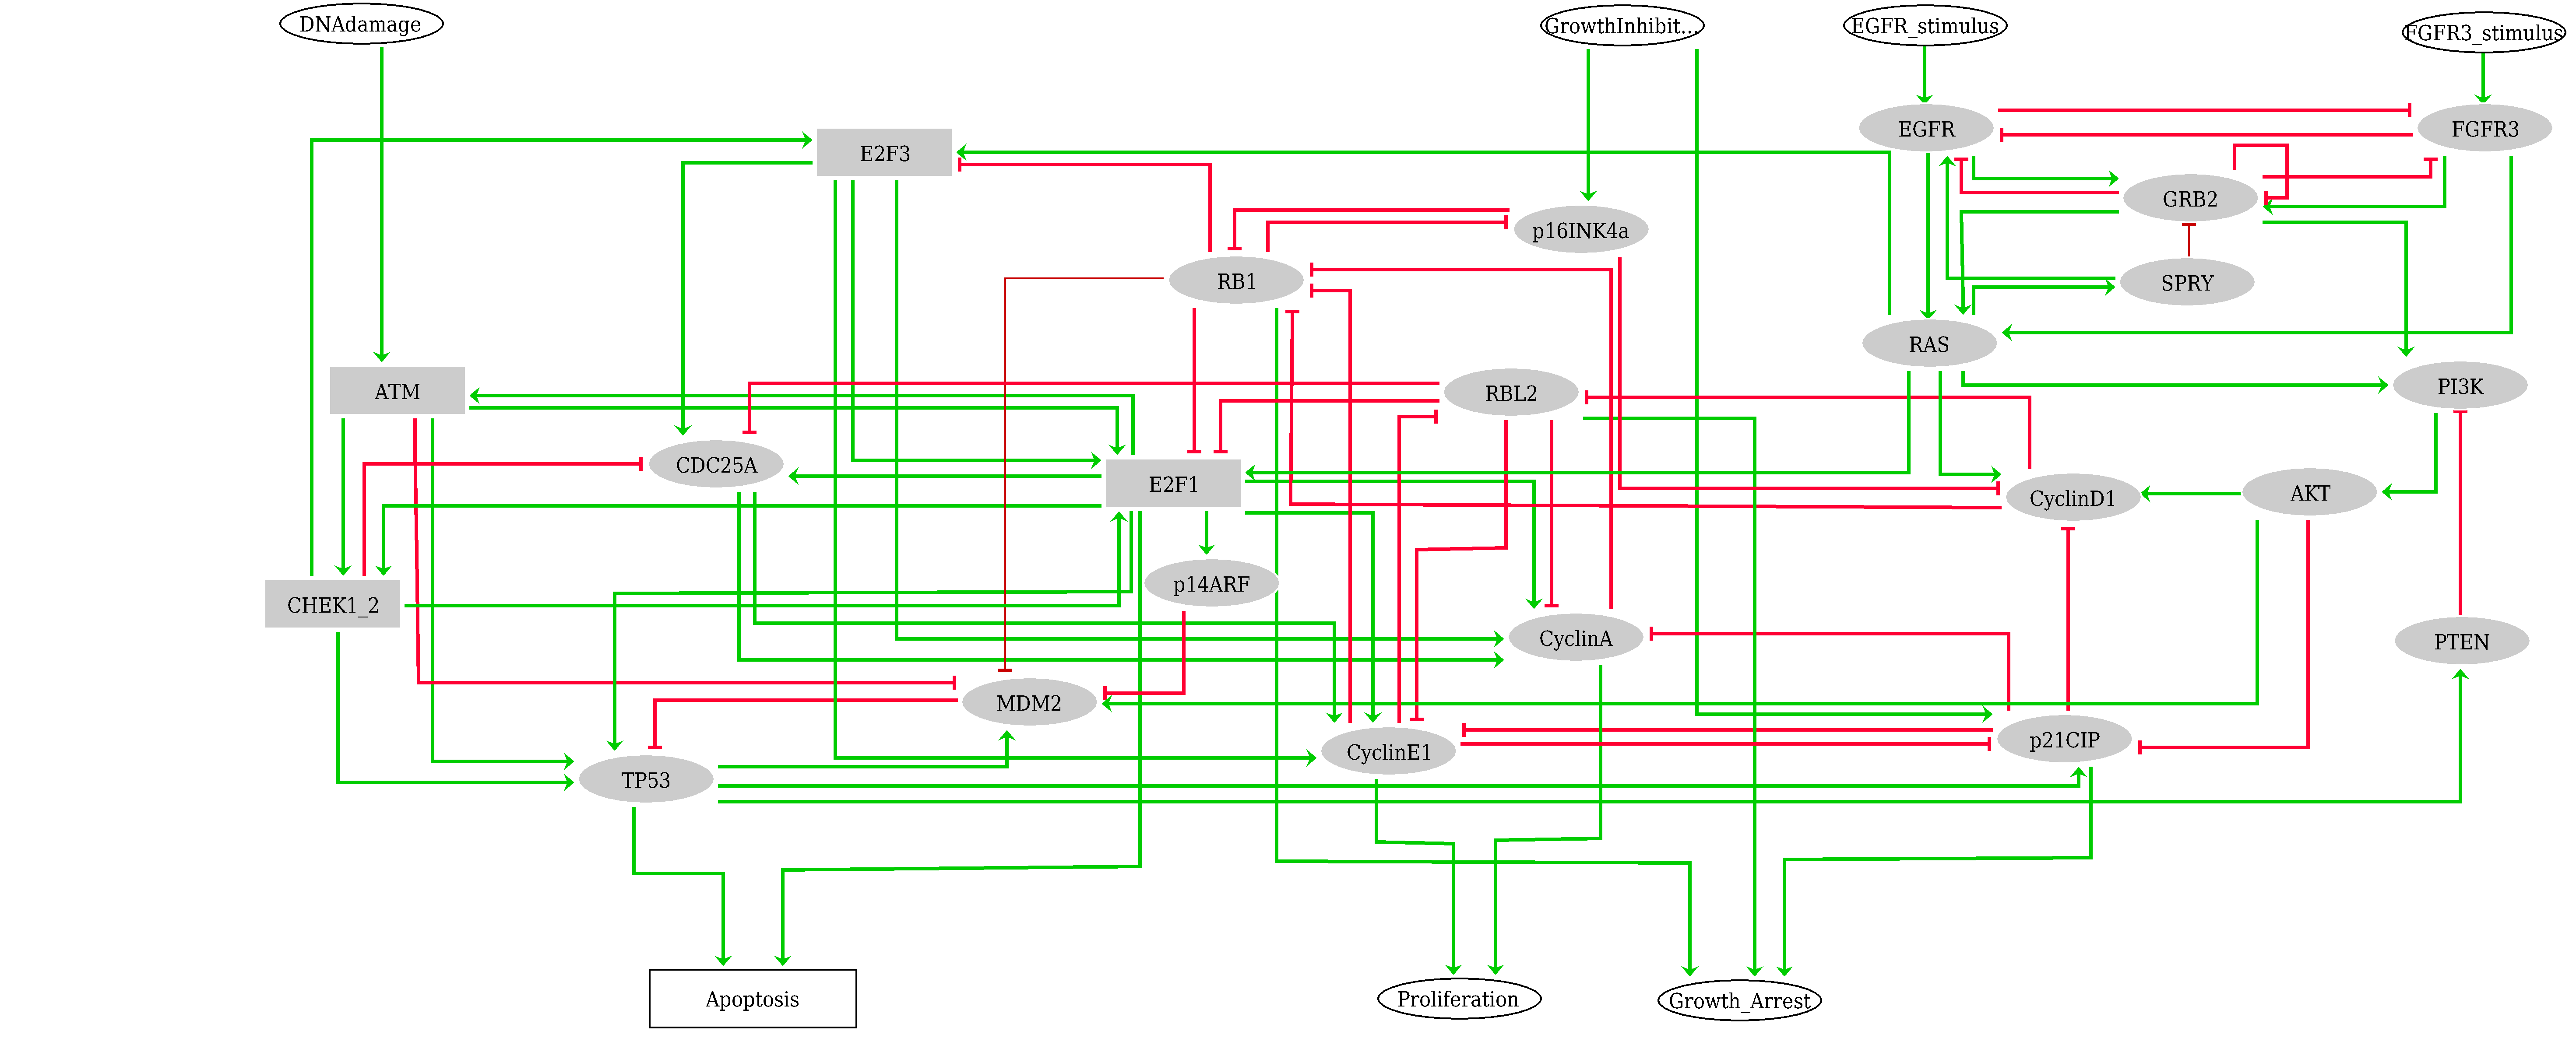

In [4]:
ginsim.show(lrg)

In [5]:
lqm = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")


# # 3) Conversion of the model from multivalued to Boolean 


bn = biolqm.to_minibn(biolqm.booleanize(lqm)).simplify()
lqm2 = bn.to_biolqm()
ig = biolqm.influence_graph(lqm2)

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

Computation of wild-type trapspaces 

# computing graph layout...


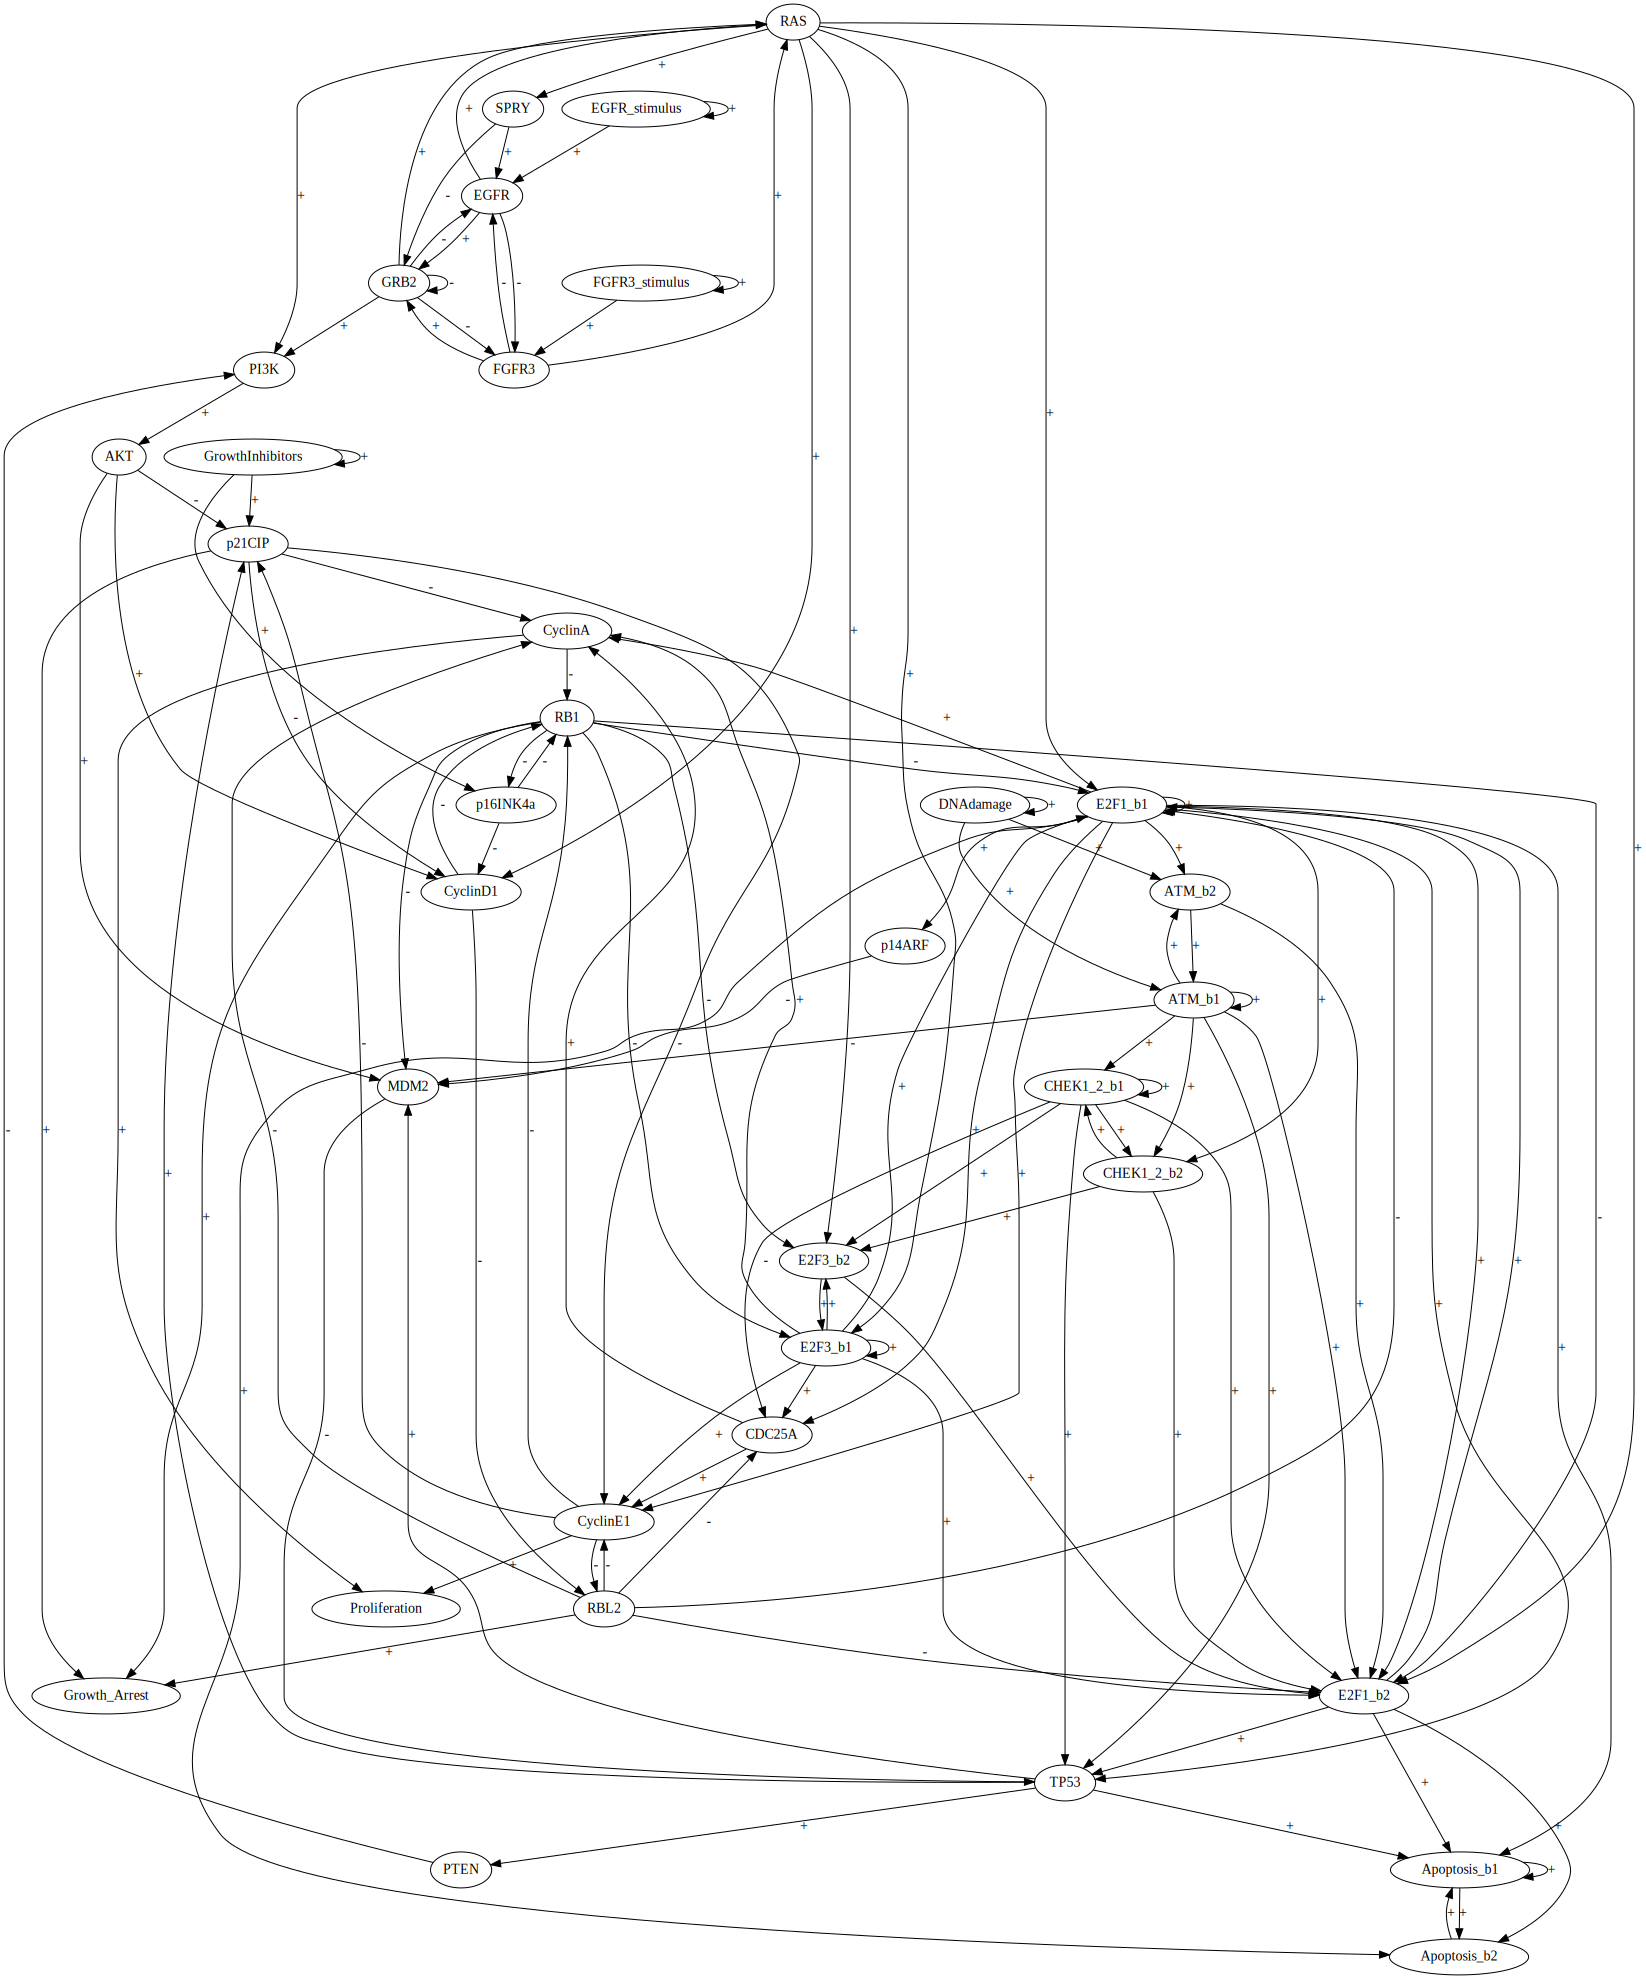

In [6]:
ig

In [7]:
wt_traps=biolqm.trapspace(lqm2, "terminal")
pd.DataFrame(wt_traps)

AKT  ATM_b1  ATM_b2  Apoptosis_b1  Apoptosis_b2  CDC25A  CHEK1_2_b1  \
0     0       0       0             0             0       0           0   
1     0       0       0             0             0       0           0   
2     0       1       0             1             0       0           1   
3     0       1       0             1             0       0           1   
4     0       0       0             0             0       0           0   
5     0       1       0             1             0       0           1   
6     0       0       0             0             0       0           0   
7     0       1       0             1             0       0           1   
8     0       0       0             0             0       0           0   
9     0       1       0             1             0       0           1   
10    0       1       0             1             0       0           1   
11    0       1       0             1             0       0           1   
12    0       1       0             1             0       0           1   
13    0       1       0             1             0       0           1   
14    0       0       0             0             0       1           0   
15    0       0       0             0             0       1           0   
16    0       0       0             0             0       0           0   
17    0       0       0             0             0       0           0   
18    0       1       0             1             0       0           1   
19    0       1       0             1             0       0           1   
20  254       0       0             0             0       0           0   
21    0       1       0             1             0       0           1   
22    0       0       0             0             0       1           0   
23    0       0       0             0             0       1           0   
24  254       0       0             0             0     254           0   

    CHEK1_2_b2  CyclinA  CyclinD1  ...  PTEN  Proliferation  RAS  RB1  RBL2  \
0            0        0         0  ...     0              0    0    1     1   
1            0        0         0  ...     0              0    0    1     1   
2            0        0         0  ...     1              0    0    1     1   
3            0        0         0  ...     1              0    0    1     1   
4            0        0         0  ...     0              0    0    0     1   
5            0        0         0  ...     1              0    0    0     1   
6            0        0         0  ...     0              0    1    1     1   
7            0        0         0  ...     1              0    1    1     1   
8            0        0         0  ...     0              0    1    1     1   
9            0        0         0  ...     1              0    1    1     1   
10           0        0         0  ...     1              0  254    1     1   
11           0        0         0  ...     1              0    1    1     1   
12           0        0         0  ...     1              0    1    1     1   
13           0        0         0  ...     1              0  254    1     1   
14           0        1         0  ...     0              1    1    0     0   
15           0        1         0  ...     0              1    1    0     0   
16           0        0         0  ...     0              0    1    0     1   
17           0        0         0  ...     0              0    1    0     1   
18           0        0         0  ...     1              0    1    0     1   
19           0        0         0  ...     1              0    1    0     1   
20           0        0         0  ...     0              0  254    0     1   
21           0        0         0  ...     1              0  254    0     1   
22           0        1         1  ...     0              1    1    0     0   
23           0        1         1  ...     0              1    1    0     0   
24           0      254       254  ...     0            254  254  254   254   

## Partition of unitary perturbations

### Generation of all possible unitary edge and node perturbations 

TO DO

In [8]:
nodes=set([str(c) for c in lqm2.getComponents()])
nodes

{'AKT',
 'ATM_b1',
 'ATM_b2',
 'Apoptosis_b1',
 'Apoptosis_b2',
 'CDC25A',
 'CHEK1_2_b1',
 'CHEK1_2_b2',
 'CyclinA',
 'CyclinD1',
 'CyclinE1',
 'DNAdamage',
 'E2F1_b1',
 'E2F1_b2',
 'E2F3_b1',
 'E2F3_b2',
 'EGFR',
 'EGFR_stimulus',
 'FGFR3',
 'FGFR3_stimulus',
 'GRB2',
 'GrowthInhibitors',
 'Growth_Arrest',
 'MDM2',
 'PI3K',
 'PTEN',
 'Proliferation',
 'RAS',
 'RB1',
 'RBL2',
 'SPRY',
 'TP53',
 'p14ARF',
 'p16INK4a',
 'p21CIP'}

In [51]:
outputs ={'Proliferation','Growth_Arrest','Apoptosis_b1',
 'Apoptosis_b2','DNAdamage', 'GrowthInhibitors','EGFR_stimulus','FGFR3_stimulus'}

In [52]:
internal_nodes=nodes-outputs
internal_nodes

{'AKT',
 'ATM_b1',
 'ATM_b2',
 'CDC25A',
 'CHEK1_2_b1',
 'CHEK1_2_b2',
 'CyclinA',
 'CyclinD1',
 'CyclinE1',
 'E2F1_b1',
 'E2F1_b2',
 'E2F3_b1',
 'E2F3_b2',
 'EGFR',
 'FGFR3',
 'GRB2',
 'MDM2',
 'PI3K',
 'PTEN',
 'RAS',
 'RB1',
 'RBL2',
 'SPRY',
 'TP53',
 'p14ARF',
 'p16INK4a',
 'p21CIP'}

In [53]:
nodes_p={str(c)+'%0' for c in internal_nodes}.union({str(c)+'%1' for c in internal_nodes})
nodes_p

{'AKT%0',
 'AKT%1',
 'ATM_b1%0',
 'ATM_b1%1',
 'ATM_b2%0',
 'ATM_b2%1',
 'CDC25A%0',
 'CDC25A%1',
 'CHEK1_2_b1%0',
 'CHEK1_2_b1%1',
 'CHEK1_2_b2%0',
 'CHEK1_2_b2%1',
 'CyclinA%0',
 'CyclinA%1',
 'CyclinD1%0',
 'CyclinD1%1',
 'CyclinE1%0',
 'CyclinE1%1',
 'E2F1_b1%0',
 'E2F1_b1%1',
 'E2F1_b2%0',
 'E2F1_b2%1',
 'E2F3_b1%0',
 'E2F3_b1%1',
 'E2F3_b2%0',
 'E2F3_b2%1',
 'EGFR%0',
 'EGFR%1',
 'FGFR3%0',
 'FGFR3%1',
 'GRB2%0',
 'GRB2%1',
 'MDM2%0',
 'MDM2%1',
 'PI3K%0',
 'PI3K%1',
 'PTEN%0',
 'PTEN%1',
 'RAS%0',
 'RAS%1',
 'RB1%0',
 'RB1%1',
 'RBL2%0',
 'RBL2%1',
 'SPRY%0',
 'SPRY%1',
 'TP53%0',
 'TP53%1',
 'p14ARF%0',
 'p14ARF%1',
 'p16INK4a%0',
 'p16INK4a%1',
 'p21CIP%0',
 'p21CIP%1'}

In [66]:
ig = biolqm.influence_graph(lqm2)
len(list(ig.edges()))

115

In [67]:
internal_edges=[(source,target) for (source,target) in ig.edges() if target in internal_nodes and source in internal_nodes]

In [68]:
edges_p={str(source) +':'+str(target)+'%0' for (source,target) in internal_edges}.union({str(source) +':'+str(target)+'%1' for (source,target) in internal_edges})

In [69]:
internal_edges

[('PI3K', 'AKT'),
 ('AKT', 'CyclinD1'),
 ('AKT', 'MDM2'),
 ('AKT', 'p21CIP'),
 ('ATM_b1', 'ATM_b1'),
 ('ATM_b1', 'ATM_b2'),
 ('ATM_b1', 'CHEK1_2_b1'),
 ('ATM_b1', 'CHEK1_2_b2'),
 ('ATM_b1', 'E2F1_b2'),
 ('ATM_b1', 'MDM2'),
 ('ATM_b1', 'TP53'),
 ('ATM_b2', 'ATM_b1'),
 ('ATM_b2', 'E2F1_b2'),
 ('E2F1_b1', 'ATM_b2'),
 ('E2F1_b1', 'CDC25A'),
 ('E2F1_b1', 'CHEK1_2_b2'),
 ('E2F1_b1', 'CyclinA'),
 ('E2F1_b1', 'CyclinE1'),
 ('E2F1_b1', 'E2F1_b1'),
 ('E2F1_b1', 'E2F1_b2'),
 ('E2F1_b1', 'TP53'),
 ('E2F1_b1', 'p14ARF'),
 ('E2F1_b2', 'E2F1_b1'),
 ('E2F1_b2', 'TP53'),
 ('TP53', 'MDM2'),
 ('TP53', 'PTEN'),
 ('TP53', 'p21CIP'),
 ('CHEK1_2_b1', 'CDC25A'),
 ('CHEK1_2_b1', 'CHEK1_2_b1'),
 ('CHEK1_2_b1', 'CHEK1_2_b2'),
 ('CHEK1_2_b1', 'E2F1_b2'),
 ('CHEK1_2_b1', 'E2F3_b2'),
 ('CHEK1_2_b1', 'TP53'),
 ('CDC25A', 'CyclinA'),
 ('CDC25A', 'CyclinE1'),
 ('E2F3_b1', 'CDC25A'),
 ('E2F3_b1', 'CyclinA'),
 ('E2F3_b1', 'CyclinE1'),
 ('E2F3_b1', 'E2F1_b1'),
 ('E2F3_b1', 'E2F1_b2'),
 ('E2F3_b1', 'E2F3_b1'),
 ('E2F3_b1'

### Partition

In [16]:
def unit_perturbation_partitioning(nodes_p,edges_p,mod):
    ##Computes sets of networks obtained by unitary pertubations of 1) nodes 2) edges
    node_net={(pert,biolqm.perturbation(mod, pert)) for pert in nodes_p}
    edge_net={(pert,biolqm.perturbation(mod, pert)) for pert in edges_p}
    ##A node and an edge perturbation are equivalent if they lead to the same network
    node_edge_eq={(node,edge,net1) for (node,net1) in node_net for (edge,net2) in edge_net if biolqm.to_minibn(net1)==biolqm.to_minibn(net2)}   
    ##set of  node perturbation having at least an equivalent edge perturbation
    nodes_eq={node for (node,edge,net) in node_edge_eq}
    ##set of  edge perturbation equivalent to an edge perturbation
    edges_eq={edge for (node,edge,net) in node_edge_eq}
    ##list of  (node,{edge_set}) equivalent perturbations
    node_edge=list((node2,{edge for (node1,edge,net) in node_edge_eq if node1==node2}) for node2 in nodes_eq)
    ##list of  node-only perturbations
    node_only=set(nodes_p-nodes_eq)
    ##list of  edge-only perturbations
    edge_only=set(edges_p-edges_eq)
    return dict({'node-eq':nodes_eq,'edge-eq' : edges_eq,'node-only' : node_only,'edge-only':edge_only})

In [70]:
partition_dict=unit_perturbation_partitioning(nodes_p,edges_p,lqm2)

## Vizualisation  

In [71]:
partition_dict

{'node-eq': {'AKT%0',
  'AKT%1',
  'ATM_b2%0',
  'CDC25A%0',
  'CHEK1_2_b1%1',
  'CHEK1_2_b2%0',
  'CyclinA%0',
  'CyclinD1%0',
  'CyclinE1%0',
  'E2F1_b2%0',
  'E2F3_b2%0',
  'EGFR%0',
  'FGFR3%0',
  'GRB2%1',
  'MDM2%0',
  'PI3K%0',
  'PTEN%0',
  'PTEN%1',
  'RAS%1',
  'RB1%0',
  'RBL2%0',
  'SPRY%0',
  'SPRY%1',
  'TP53%0',
  'p14ARF%0',
  'p14ARF%1',
  'p16INK4a%0',
  'p21CIP%0'},
 'edge-eq': {'AKT:p21CIP%1',
  'ATM_b1:ATM_b2%0',
  'ATM_b1:CHEK1_2_b1%1',
  'ATM_b1:CHEK1_2_b2%0',
  'ATM_b1:E2F1_b2%0',
  'ATM_b1:MDM2%1',
  'ATM_b2:E2F1_b2%0',
  'CDC25A:CyclinA%0',
  'CDC25A:CyclinE1%0',
  'CHEK1_2_b1:CDC25A%1',
  'CHEK1_2_b1:CHEK1_2_b2%0',
  'CHEK1_2_b1:E2F1_b2%0',
  'CHEK1_2_b1:E2F3_b2%0',
  'CHEK1_2_b2:E2F1_b2%0',
  'CHEK1_2_b2:E2F3_b2%0',
  'CyclinA:RB1%1',
  'CyclinD1:RB1%1',
  'CyclinD1:RBL2%1',
  'CyclinE1:RB1%1',
  'CyclinE1:RBL2%1',
  'CyclinE1:p21CIP%1',
  'E2F1_b1:ATM_b2%0',
  'E2F1_b1:CHEK1_2_b2%0',
  'E2F1_b1:E2F1_b2%0',
  'E2F1_b1:p14ARF%0',
  'E2F1_b1:p14ARF%1',
  'E2F3

In [72]:
def partition_pert_count(partition_dict):
    node_eq=len(partition_dict['node-eq'])
    edge_eq=len(partition_dict['edge-eq'])
    node_only=len(partition_dict['node-only'])
    edge_only=len(partition_dict['edge-only'])
    return [node_eq,edge_eq,node_only,edge_only]

In [73]:
res2=partition_pert_count(partition_dict)
res2

[28, 60, 26, 124]

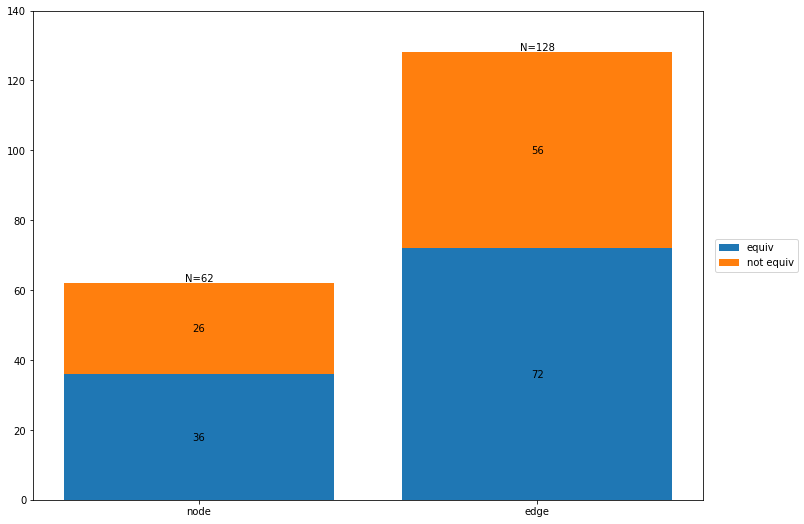

In [21]:
x = ["node","edge"]
y1 = np.array([res2[0],res2[1]])
y2 = np.array([res2[2],res2[3]])

# memo of sample number
snum = y1+y2

# normalization
#y1 = y1/snum*100.
#y2 = y2/snum*100.

plt.figure(figsize=(12,9))

# stack bars
plt.bar(x, y1, label='equiv')
plt.bar(x, y2 ,bottom=y1,label='not equiv')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,140)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

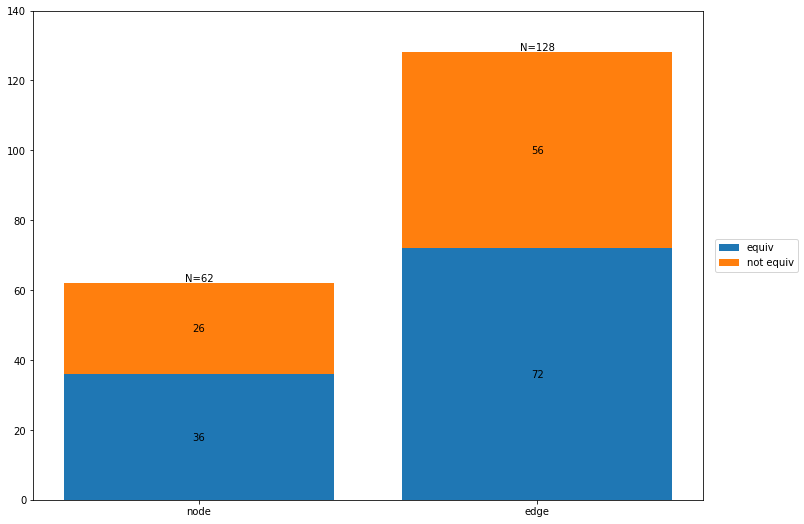

In [22]:
plt.figure(figsize=(12,9))

# stack bars
plt.bar(x, y1, label='equiv')
plt.bar(x, y2 ,bottom=y1,label='not equiv')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%d"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,140)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)

# 2 Classification of unitary perturbations

In [23]:
partition_dict

{'node-eq': {'AKT%0',
  'AKT%1',
  'CDC25A%0',
  'CDC25A%1',
  'CyclinA%0',
  'CyclinA%1',
  'CyclinD1%0',
  'CyclinE1%0',
  'CyclinE1%1',
  'DNAdamage%0',
  'DNAdamage%1',
  'EGFR%0',
  'EGFR_stimulus%0',
  'EGFR_stimulus%1',
  'FGFR3%0',
  'FGFR3_stimulus%0',
  'FGFR3_stimulus%1',
  'GRB2%1',
  'GrowthInhibitors%0',
  'GrowthInhibitors%1',
  'MDM2%0',
  'MDM2%1',
  'PI3K%0',
  'PTEN%0',
  'PTEN%1',
  'RAS%1',
  'RB1%0',
  'RBL2%0',
  'SPRY%0',
  'SPRY%1',
  'TP53%0',
  'TP53%1',
  'p14ARF%0',
  'p14ARF%1',
  'p16INK4a%0',
  'p21CIP%0'},
 'edge-eq': {'AKT:p21CIP%1',
  'ATM:MDM2%0',
  'ATM:MDM2%1',
  'ATM:TP53%0',
  'ATM:TP53%1',
  'CDC25A:CyclinA%0',
  'CDC25A:CyclinE1%0',
  'CHEK1_2:CDC25A%0',
  'CHEK1_2:CDC25A%1',
  'CHEK1_2:TP53%0',
  'CHEK1_2:TP53%1',
  'CyclinA:RB1%1',
  'CyclinD1:RB1%1',
  'CyclinD1:RBL2%1',
  'CyclinE1:RB1%1',
  'CyclinE1:RBL2%1',
  'CyclinE1:p21CIP%1',
  'DNAdamage:DNAdamage%0',
  'DNAdamage:DNAdamage%1',
  'E2F1:CDC25A%0',
  'E2F1:CDC25A%1',
  'E2F1:CyclinA%0

In [24]:
def trapfamily(mod,pert_list):
    netlist=list(map(lambda pert: biolqm.perturbation(mod, pert),pert_list))
    mut_trapslist=list(map(lambda net: biolqm.trapspace(net, "terminal"),netlist))
    return mut_trapslist

The following function computes all the trapspaces of each mutant networks derived from the wild-type network mod by unitary perturbations of the list pert_list.

## 2.1 Perturbations types

## 2.1.1 Edgetic 

In [25]:
edgetic_tf=trapfamily(lqm2,partition_dict['edge-only'])
edgetic_tf

[[{'AKT': 0,
   'ATM_b1': 0,
   'ATM_b2': 0,
   'Apoptosis_b1': 0,
   'Apoptosis_b2': 0,
   'CDC25A': 0,
   'CHEK1_2_b1': 0,
   'CHEK1_2_b2': 0,
   'CyclinA': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'DNAdamage': 0,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'EGFR': 0,
   'EGFR_stimulus': 0,
   'FGFR3': 0,
   'FGFR3_stimulus': 0,
   'GRB2': 0,
   'GrowthInhibitors': 1,
   'Growth_Arrest': 1,
   'MDM2': 0,
   'PI3K': 0,
   'PTEN': 0,
   'Proliferation': 0,
   'RAS': 0,
   'RB1': 1,
   'RBL2': 1,
   'SPRY': 0,
   'TP53': 0,
   'p14ARF': 0,
   'p16INK4a': 0,
   'p21CIP': 1},
  {'AKT': 0,
   'ATM_b1': 0,
   'ATM_b2': 0,
   'Apoptosis_b1': 0,
   'Apoptosis_b2': 0,
   'CDC25A': 0,
   'CHEK1_2_b1': 0,
   'CHEK1_2_b2': 0,
   'CyclinA': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'DNAdamage': 0,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'EGFR': 0,
   'EGFR_stimulus': 0,
   'FGFR3': 0,
   'FGFR3_stimulus': 0,
   'GRB2': 0,
   'GrowthInhibit

### 2.1.2 Node-edge and edge-node

In [26]:
edge_node_pert=partition_dict['edge-eq']
node_edge_pert=partition_dict['node-eq']

partition_dict['edge-eq']

{'AKT:p21CIP%1',
 'ATM:MDM2%0',
 'ATM:MDM2%1',
 'ATM:TP53%0',
 'ATM:TP53%1',
 'CDC25A:CyclinA%0',
 'CDC25A:CyclinE1%0',
 'CHEK1_2:CDC25A%0',
 'CHEK1_2:CDC25A%1',
 'CHEK1_2:TP53%0',
 'CHEK1_2:TP53%1',
 'CyclinA:RB1%1',
 'CyclinD1:RB1%1',
 'CyclinD1:RBL2%1',
 'CyclinE1:RB1%1',
 'CyclinE1:RBL2%1',
 'CyclinE1:p21CIP%1',
 'DNAdamage:DNAdamage%0',
 'DNAdamage:DNAdamage%1',
 'E2F1:CDC25A%0',
 'E2F1:CDC25A%1',
 'E2F1:CyclinA%0',
 'E2F1:CyclinA%1',
 'E2F1:CyclinE1%0',
 'E2F1:CyclinE1%1',
 'E2F1:TP53%0',
 'E2F1:TP53%1',
 'E2F1:p14ARF%0',
 'E2F1:p14ARF%1',
 'E2F3:CDC25A%0',
 'E2F3:CDC25A%1',
 'E2F3:CyclinA%0',
 'E2F3:CyclinA%1',
 'E2F3:CyclinE1%0',
 'E2F3:CyclinE1%1',
 'EGFR:FGFR3%1',
 'EGFR:GRB2%1',
 'EGFR:RAS%1',
 'EGFR_stimulus:EGFR_stimulus%0',
 'EGFR_stimulus:EGFR_stimulus%1',
 'FGFR3:EGFR%1',
 'FGFR3:RAS%1',
 'FGFR3_stimulus:FGFR3%0',
 'FGFR3_stimulus:FGFR3_stimulus%0',
 'FGFR3_stimulus:FGFR3_stimulus%1',
 'GRB2:EGFR%1',
 'GRB2:FGFR3%1',
 'GRB2:PI3K%0',
 'GRB2:RAS%1',
 'GrowthInhibitors:Gro

In [27]:
node_edge_tf=trapfamily(lqm,node_edge_pert)
node_edge_tf

[[{'EGFR_stimulus': 0,
   'FGFR3_stimulus': 0,
   'DNAdamage': 0,
   'GrowthInhibitors': 1,
   'Proliferation': 0,
   'Apoptosis_b1': 0,
   'Apoptosis_b2': 0,
   'Growth_Arrest': 1,
   'EGFR': 0,
   'FGFR3': 0,
   'RAS': 0,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'CyclinA': 0,
   'CDC25A': 0,
   'p16INK4a': 0,
   'RB1': 1,
   'RBL2': 1,
   'p21CIP': 1,
   'ATM_b1': 0,
   'ATM_b2': 0,
   'CHEK1_2_b1': 0,
   'CHEK1_2_b2': 0,
   'MDM2': 0,
   'TP53': 0,
   'p14ARF': 0,
   'PTEN': 0,
   'PI3K': 0,
   'AKT': 0,
   'GRB2': 0,
   'SPRY': 0},
  {'EGFR_stimulus': 0,
   'FGFR3_stimulus': 0,
   'DNAdamage': 0,
   'GrowthInhibitors': 0,
   'Proliferation': 0,
   'Apoptosis_b1': 0,
   'Apoptosis_b2': 0,
   'Growth_Arrest': 1,
   'EGFR': 0,
   'FGFR3': 0,
   'RAS': 0,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'CyclinA': 0,
   'CDC25A': 0,
   'p16INK4a': 0,
   'RB1': 1,


### 2.1.3 Node perturbations

In [28]:
node_pert=partition_dict['node-only']
node_pert

{'ATM_b1%0',
 'ATM_b1%1',
 'ATM_b2%0',
 'ATM_b2%1',
 'CHEK1_2_b1%0',
 'CHEK1_2_b1%1',
 'CHEK1_2_b2%0',
 'CHEK1_2_b2%1',
 'CyclinD1%1',
 'E2F1_b1%0',
 'E2F1_b1%1',
 'E2F1_b2%0',
 'E2F1_b2%1',
 'E2F3_b1%0',
 'E2F3_b1%1',
 'E2F3_b2%0',
 'E2F3_b2%1',
 'EGFR%1',
 'FGFR3%1',
 'GRB2%0',
 'PI3K%1',
 'RAS%0',
 'RB1%1',
 'RBL2%1',
 'p16INK4a%1',
 'p21CIP%1'}

In [29]:
node_tf=trapfamily(lqm2,partition_dict['node-only'])
node_tf

[[{'AKT': 0,
   'ATM_b1': 1,
   'ATM_b2': 0,
   'Apoptosis_b1': 1,
   'Apoptosis_b2': 0,
   'CDC25A': 0,
   'CHEK1_2_b1': 1,
   'CHEK1_2_b2': 0,
   'CyclinA': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'DNAdamage': 1,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'EGFR': 0,
   'EGFR_stimulus': 0,
   'FGFR3': 0,
   'FGFR3_stimulus': 0,
   'GRB2': 0,
   'GrowthInhibitors': 0,
   'Growth_Arrest': 1,
   'MDM2': 0,
   'PI3K': 0,
   'PTEN': 1,
   'Proliferation': 0,
   'RAS': 0,
   'RB1': 1,
   'RBL2': 1,
   'SPRY': 0,
   'TP53': 1,
   'p14ARF': 0,
   'p16INK4a': 0,
   'p21CIP': 1},
  {'AKT': 0,
   'ATM_b1': 1,
   'ATM_b2': 0,
   'Apoptosis_b1': 1,
   'Apoptosis_b2': 0,
   'CDC25A': 0,
   'CHEK1_2_b1': 1,
   'CHEK1_2_b2': 0,
   'CyclinA': 0,
   'CyclinD1': 0,
   'CyclinE1': 0,
   'DNAdamage': 1,
   'E2F1_b1': 0,
   'E2F1_b2': 0,
   'E2F3_b1': 0,
   'E2F3_b2': 0,
   'EGFR': 0,
   'EGFR_stimulus': 0,
   'FGFR3': 0,
   'FGFR3_stimulus': 0,
   'GRB2': 0,
   'GrowthInhibit

## 2.1 Formatting of trapspaces for classification

In [30]:
def format_trapspace(ts):
    dict_traps=list(map(lambda x : dict(x),ts))
    traps_set=frozenset(map(lambda x : frozenset(x.items()),dict_traps))
    return traps_set

### 1.3.2 Wildtype trapspaces

In [31]:
wt_ts=format_trapspace(wt_traps)
wt_ts

frozenset({frozenset({('AKT', 0),
                      ('ATM_b1', 0),
                      ('ATM_b2', 0),
                      ('Apoptosis_b1', 0),
                      ('Apoptosis_b2', 0),
                      ('CDC25A', 0),
                      ('CHEK1_2_b1', 0),
                      ('CHEK1_2_b2', 0),
                      ('CyclinA', 0),
                      ('CyclinD1', 0),
                      ('CyclinE1', 0),
                      ('DNAdamage', 0),
                      ('E2F1_b1', 0),
                      ('E2F1_b2', 0),
                      ('E2F3_b1', 1),
                      ('E2F3_b2', 0),
                      ('EGFR', 0),
                      ('EGFR_stimulus', 1),
                      ('FGFR3', 1),
                      ('FGFR3_stimulus', 1),
                      ('GRB2', 0),
                      ('GrowthInhibitors', 1),
                      ('Growth_Arrest', 1),
                      ('MDM2', 0),
                      ('PI3K', 0),
                      (

### 2.1.2 Mutants trapspaces

In [32]:
edgetic_ts=list(map(lambda y : format_trapspace(y),edgetic_tf))
edgetic_ts

[frozenset({frozenset({('AKT', 0),
                       ('ATM_b1', 0),
                       ('ATM_b2', 0),
                       ('Apoptosis_b1', 0),
                       ('Apoptosis_b2', 0),
                       ('CDC25A', 0),
                       ('CHEK1_2_b1', 0),
                       ('CHEK1_2_b2', 0),
                       ('CyclinA', 0),
                       ('CyclinD1', 0),
                       ('CyclinE1', 0),
                       ('DNAdamage', 0),
                       ('E2F1_b1', 0),
                       ('E2F1_b2', 0),
                       ('E2F3_b1', 0),
                       ('E2F3_b2', 0),
                       ('EGFR', 0),
                       ('EGFR_stimulus', 0),
                       ('FGFR3', 0),
                       ('FGFR3_stimulus', 0),
                       ('GRB2', 0),
                       ('GrowthInhibitors', 0),
                       ('Growth_Arrest', 1),
                       ('MDM2', 0),
                       ('PI3K', 0)

In [33]:
node_edge_ts=list(map(lambda y : format_trapspace(y),node_edge_tf))
node_edge_ts

[frozenset({frozenset({('AKT', 0),
                       ('ATM_b1', 1),
                       ('ATM_b2', 0),
                       ('Apoptosis_b1', 1),
                       ('Apoptosis_b2', 0),
                       ('CDC25A', 0),
                       ('CHEK1_2_b1', 1),
                       ('CHEK1_2_b2', 0),
                       ('CyclinA', 0),
                       ('CyclinD1', 0),
                       ('CyclinE1', 0),
                       ('DNAdamage', 1),
                       ('E2F1_b1', 0),
                       ('E2F1_b2', 0),
                       ('E2F3_b1', 0),
                       ('E2F3_b2', 0),
                       ('EGFR', 254),
                       ('EGFR_stimulus', 1),
                       ('FGFR3', 254),
                       ('FGFR3_stimulus', 1),
                       ('GRB2', 254),
                       ('GrowthInhibitors', 0),
                       ('Growth_Arrest', 1),
                       ('MDM2', 0),
                       ('PI3

In [34]:
node_ts=list(map(lambda y : format_trapspace(y),node_tf))
node_ts

[frozenset({frozenset({('AKT', 0),
                       ('ATM_b1', 0),
                       ('ATM_b2', 0),
                       ('Apoptosis_b1', 0),
                       ('Apoptosis_b2', 0),
                       ('CDC25A', 0),
                       ('CHEK1_2_b1', 0),
                       ('CHEK1_2_b2', 0),
                       ('CyclinA', 0),
                       ('CyclinD1', 0),
                       ('CyclinE1', 0),
                       ('DNAdamage', 0),
                       ('E2F1_b1', 0),
                       ('E2F1_b2', 0),
                       ('E2F3_b1', 1),
                       ('E2F3_b2', 0),
                       ('EGFR', 0),
                       ('EGFR_stimulus', 1),
                       ('FGFR3', 1),
                       ('FGFR3_stimulus', 1),
                       ('GRB2', 0),
                       ('GrowthInhibitors', 1),
                       ('Growth_Arrest', 1),
                       ('MDM2', 0),
                       ('PI3K', 0)

## 2.2 Classification by comparison to wild-type trapspaces

In [35]:
def classification(wt,mut):
    if wt==mut : return 1 
    elif wt>mut : return 2 
    else: 
        if not wt.intersection(mut) : return 3 
        else: return 4

In [36]:
edgetic_classes=list(map(lambda x : classification(wt_ts, x),edgetic_ts))
edgetic_classes

[4,
 4,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 4,
 4]

In [37]:
node_edge_classes=list(map(lambda x : classification(wt_ts, x),node_edge_ts))
node_edge_classes

[4,
 2,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 3,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 3,
 4,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3]

In [38]:
node_classes=list(map(lambda x : classification(wt_ts, x),node_ts))
node_classes

[4, 4, 3, 1, 4, 4, 1, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4]

In [39]:
edgetic_classes.count(3)

0

In [40]:
edgetic_classes.count(4)

31

# 3 Visualisation

In [41]:
def class_pert_count(node_edge,edgetic,node):
    silent_count_node=list(map(lambda x : x.count(1),[node_edge,edgetic,node]))
    spec_count_node=list(map(lambda x : x.count(2),[node_edge,edgetic,node]))
    div1_count_node=list(map(lambda x : x.count(3),[node_edge,edgetic,node]))
    div2_count_node=list(map(lambda x : x.count(4),[node_edge,edgetic,node]))
    return [silent_count_node,spec_count_node,div1_count_node,div2_count_node]

In [42]:
res=class_pert_count(node_edge_classes,edgetic_classes,node_classes)
res
print('toto')

toto


In [43]:
scipy.stats.chi2_contingency(res)

(38.95871931368727,
 7.292200674702341e-07,
 6,
 array([[ 7.93220339, 12.33898305,  5.72881356],
        [ 3.3559322 ,  5.22033898,  2.42372881],
        [ 2.74576271,  4.27118644,  1.98305085],
        [21.96610169, 34.16949153, 15.86440678]]))

In [44]:
x = ["node-edge","edgetic","node"]
y1 = np.array(res[0])
y2 = np.array(res[1])
y3 = np.array(res[2])
y4 = np.array(res[3])

# memo of sample number
snum = y1+y2+y3+y4

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.

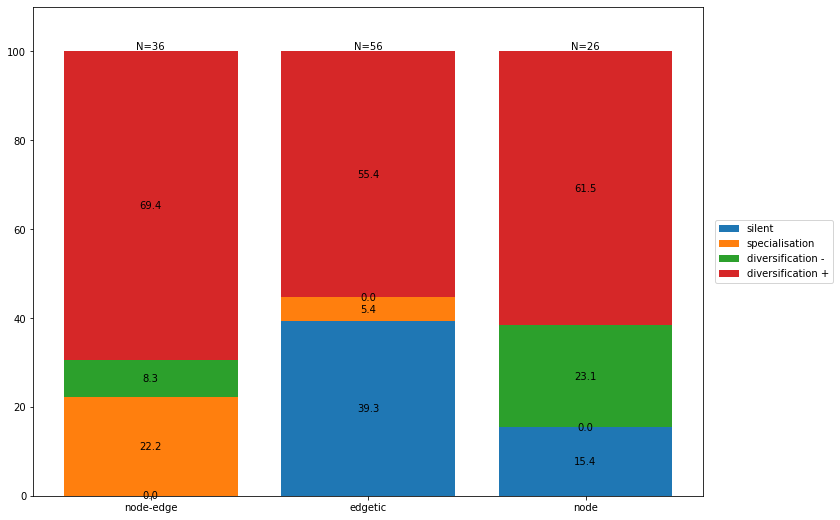

In [45]:
plt.figure(figsize=(12,9))

# stack bars
plt.bar(x, y1, label='silent')
plt.bar(x, y2 ,bottom=y1,label='specialisation')
plt.bar(x, y3 ,bottom=y1+y2,label='diversification -')
plt.bar(x, y4 ,bottom=y1+y2+y3,label='diversification +')

# add text annotation corresponding to the percentage of each data.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
    #plt.text(xpos, ypos, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2+y3+y4, snum):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,110)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.savefig('normalized_stacked_barplot_with_number.png', bbox_inches='tight', pad_inches=0.02)